In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from pymatgen.core.spectrum import Spectrum as pydos
import vapeplot
from matplotlib import gridspec

In [6]:
def _3gaussian(x, amp1,cen1,sigma1, amp2,cen2,sigma2, amp3,cen3,sigma3):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen2)/sigma2)**2)))+\
            amp3*(1/(sigma3*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen3)/sigma3)**2)))
                
def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))

In [7]:
def get_dos(fname="data/Op.lda.r3-m",smear=0,coloumn=1):
    data=np.loadtxt(fname,comments="%")
    data.T[coloumn][np.where(data.T[0]<0)]=0
    dos=pydos(data.T[0],data.T[coloumn])
    if smear!=0:
        dos.smear(smear)
    dos.normalize(mode='max', value=1)
    return (dos.x,dos.y)

# Actual plots

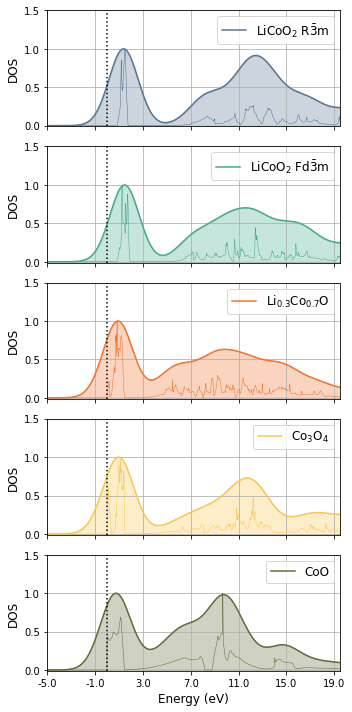

In [34]:
import matplotlib.ticker as ticker

s=1.2;fs=12
fig,ax1=plt.subplots(5,1,figsize=(5,10))
plt.subplots_adjust(hspace=0)



colors=["#577590","#43aa8b","#f9c74f","#606c38","#f3722c"]
ax=ax1[0]
fname="data/Op.lda.r3-m";c=colors[0];label="LiCoO$_2$ R$\\bar{3}$m"
e,dos=get_dos(fname,smear=0)
ax.plot(e,dos,ls="-",alpha=1,c=c,lw=0.5)
e,dos=get_dos(fname,smear=s)
ax.plot(e,dos,c=c,label=label)
ax.fill_between(e,dos,color=c,alpha=0.3)

ax=ax1[1]
fname="data/Op.lda.fd3-m";c=colors[1];label="LiCoO$_2$ Fd$\\bar{3}$m"
e,dos=get_dos(fname,smear=0)
ax.plot(e,dos,ls="-",alpha=1,c=c,lw=0.5)
e,dos=get_dos(fname,smear=s)
ax.plot(e,dos,c=c,label=label)
ax.fill_between(e,dos,color=c,alpha=0.3)


ax=ax1[2]
fname="data/Op.lda.cooli0.3";c=colors[4];label="Li$_{0.3}$Co$_{0.7}$O"
e,dos=get_dos(fname,smear=0)
ax.plot(e,dos,ls="-",alpha=1,c=c,lw=0.5)
e,dos=get_dos(fname,smear=s)
ax.plot(e,dos,c=c,label=label)
ax.fill_between(e,dos,color=c,alpha=0.3)



ax=ax1[3]
fname="data/Op.lda-co3o4-spinel";c=colors[2];label="Co$_3$O$_4$"
e,dos=get_dos(fname,smear=0)
ax.plot(e,dos,ls="-",alpha=1,c=c,lw=0.5)
e,dos=get_dos(fname,smear=s)
ax.plot(e,dos,c=c,label=label)
ax.fill_between(e,dos,color=c,alpha=0.3)




ax=ax1[4]
fname="data/coo-O-p";c=colors[3];label="CoO"
e,dos=get_dos(fname,smear=0)
ax.plot(e,dos,ls="-",alpha=1,c=c,lw=0.5)
e,dos=get_dos(fname,smear=s)
ax.plot(e,dos,c=c,label=label)
ax.fill_between(e,dos,color=c,alpha=0.3)
ax.set_xlabel("Energy (eV)",fontsize=fs)



for j,i in enumerate(ax1):
    i.axvline(0,c="k",ls=":")
    i.set_ylim(-0.01,1.5)
    i.set_xlim(xmin=-5,xmax=19.5)
    start, end = i.get_xlim()
    i.xaxis.set_ticks(np.arange(start, end, 4))
    i.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    i.legend(fontsize=fs)
    if j<4:
        i.set_xticklabels("")
    i.grid()
    i.set_ylabel("DOS",fontsize=fs)
    

plt.tight_layout()
plt.savefig("../figs/halyana/halyana-DOS-compare-O-p.png",dpi=300)

No handles with labels found to put in legend.


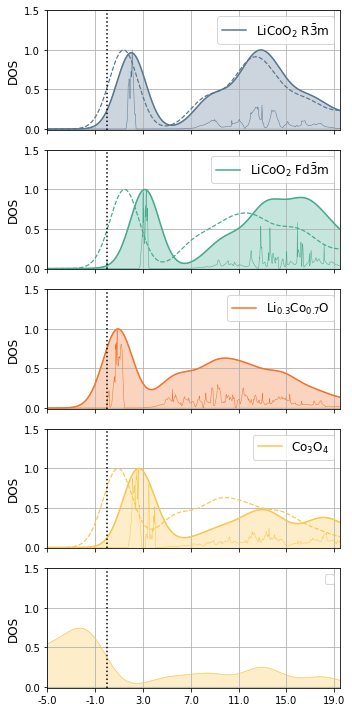

In [36]:
import matplotlib.ticker as ticker

s=1.2;fs=12
fig,ax1=plt.subplots(5,1,figsize=(5,10))
plt.subplots_adjust(hspace=0)



colors=["#577590","#43aa8b","#f9c74f","#606c38","#f3722c"]
ax=ax1[0]

fname="data/U/licoo2-r-3m-U=5";c=colors[0];label="LiCoO$_2$ R$\\bar{3}$m"
e,dos=get_dos(fname,smear=0,coloumn=2)
ax.plot(e,dos,ls="-",alpha=1,c=c,lw=0.5)
e,dos=get_dos(fname,smear=s,coloumn=2)
ax.plot(e,dos,c=c,label=label)
ax.fill_between(e,dos,color=c,alpha=0.3)
fname="data/Op.lda.r3-m"
e,dos=get_dos(fname,smear=s,coloumn=1)
ax.plot(e,dos,ls="--",alpha=1,c=c,lw=1.2)



ax=ax1[1]
fname="data/U/licoo2-fd3-m-U=5";c=colors[1];label="LiCoO$_2$ Fd$\\bar{3}$m"
e,dos=get_dos(fname,smear=0)
ax.plot(e,dos,ls="-",alpha=1,c=c,lw=0.5)
e,dos=get_dos(fname,smear=s)
ax.plot(e,dos,c=c,label=label)
ax.fill_between(e,dos,color=c,alpha=0.3)
fname="data/Op.lda.fd3-m"
e,dos=get_dos(fname,smear=s,coloumn=1)
ax.plot(e,dos,ls="--",alpha=1,c=c,lw=1.2)



ax=ax1[2]
fname="data/Op.lda.cooli0.3";c=colors[4];label="Li$_{0.3}$Co$_{0.7}$O"
e,dos=get_dos(fname,smear=0)
ax.plot(e,dos,ls="-",alpha=1,c=c,lw=0.5)
e,dos=get_dos(fname,smear=s)
ax.plot(e,dos,c=c,label=label)
ax.fill_between(e,dos,color=c,alpha=0.3)



ax=ax1[3]
fname="data/U/co3o4-U=5";c=colors[2];label="Co$_3$O$_4$"
e,dos=get_dos(fname,smear=0)
ax.plot(e,dos,ls="-",alpha=1,c=c,lw=0.5)
e,dos=get_dos(fname,smear=s)
ax.plot(e,dos,c=c,label=label)
ax.fill_between(e,dos,color=c,alpha=0.3)
fname="data/Op.lda.cooli0.3"
e,dos=get_dos(fname,smear=s,coloumn=1)
ax.plot(e,dos,ls="--",alpha=1,c=c,lw=1.2)





import pickle
with open('data/pdos.pickle', 'rb') as handle:
    dos = pickle.load(handle)
ax=ax1[4]
orb_names=list(dos.keys())
dos_data=np.array([dos[i]  for i in orb_names if ("O" in i) and ("p" in i) ]).sum(axis=0)
dos_data[np.where((dos['energy']+1<0)) and  (dos['energy']+1>20)]=0
dos=pydos(dos['energy']+1,dos_data)
dos.normalize(mode='max', value=1)
dos.smear(1.3)
ax.plot(dos.x,dos.y,ls="-",alpha=1,c=c,lw=0.5)
ax.fill_between(dos.x,dos.y,color=c,alpha=0.3)
# ax.set_xlim(-5,20)


for j,i in enumerate(ax1):
    i.axvline(0,c="k",ls=":")
    i.set_ylim(-0.01,1.5)
    i.set_xlim(xmin=-5,xmax=19.5)
    start, end = i.get_xlim()
    i.xaxis.set_ticks(np.arange(start, end, 4))
    i.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    i.legend(fontsize=fs)
    if j<4:
        i.set_xticklabels("")
    i.grid()
    i.set_ylabel("DOS",fontsize=fs)
    

plt.tight_layout()
# plt.savefig("../figs/halyana/halyana-DOS-compare-O-p-U.png",dpi=300)

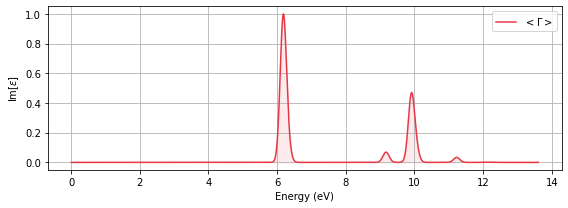

In [103]:
data=np.loadtxt("data/Gamma_optics",comments="%")
fig,ax=plt.subplots(figsize=(8,3))
dos=pydos(data.T[0]*13.605662285137,data.T[1]+data.T[2]+data.T[3])
dos.smear(9e-2)
dos.normalize(mode='max', value=1)
c="#e63946"
ax.plot(dos.x,dos.y,c=c,label="$<\\Gamma>$")
ax.fill_between(dos.x,dos.y,color=c,alpha=0.1)
ax.set_ylabel("Im$[\\epsilon]$")
ax.set_xlabel("Energy (eV)")
ax.grid("on")
plt.legend()
plt.tight_layout()
plt.savefig("../figs/halyana_near_gamma.png",dpi=300)
plt.show()

In [57]:
data=np.load("data/full_data.npy")
data=data.reshape(2000,-1)

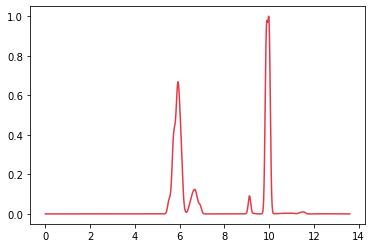

In [64]:
y=data.T[1:].reshape(3,146,2000) # axis,kpts,omega
dos=pydos(data.T[0]*13.6,y[0:2,0,:].sum(axis=0))
dos.smear(5e-2)
dos.normalize(mode='max', value=1)
c="#e63946"
plt.plot(dos.x,dos.y,c=c,label="$\\Gamma$")

In [85]:
def plot_k(omega=6,proj=[0,1],eps_axis=0,ax=None):
    '''omega: energy value
    proj: projection to plot 0-x 1-y 2-z
    eps_axis: orientation of polarization 0-x 1-y 2-z
    ax: axis object'''
    data=np.load("data/full_data.npy")
    data=data.reshape(2000,-1)
    def find_nearest(value,array=data.T[0]*13.6):
        idx = np.searchsorted(array, value, side="left")
        if idx > 0 and (idx == len(array) or np.fabs(value - array[idx-1]) < np.fabs(value - array[idx])):
            return idx-1
        else:
            return idx
    qpts_data=np.loadtxt("data/qpts",delimiter=",",skiprows=2)
    qx=qpts_data.T[0];qy=qpts_data.T[1];qz=qpts_data.T[2];index=np.array(qpts_data.T[3]-1,dtype=np.int)
    
    indx=find_nearest(omega)
    eps=[]
    x=[]
    y=[]
    z=[]
    if ax==None:
        fig,ax=plt.subplots(figsize=(5,5))
    ax.grid("on",linewidth=0.5)
    if eps_axis<3:
        for i in index:
            x.append(qx[i]);y.append(qy[i]);z.append(qz[i])
            eps.append(data.T[1:].reshape(3,146,2000)[eps_axis,:,indx][i])
    else:
        for i in index:
            x.append(qx[i]);y.append(qy[i]);z.append(qz[i])
            tmp=data.T[1:].reshape(3,146,2000)[0,:,0][i]+\
                data.T[1:].reshape(3,146,2000)[1,:,0][i]+\
                data.T[1:].reshape(3,146,2000)[2,:,0][i]
            eps.append(tmp)
    eps/=np.linalg.norm(eps)
        
    r=ax.tricontourf(np.vstack((x,y,z))[proj[0]],np.vstack((x,y,z))[proj[1]],eps,50,cmap="RdYlBu");
    ax.scatter(np.vstack((x,y,z))[proj[0]],np.vstack((x,y,z))[proj[1]],s=15,c="w",edgecolor="k",alpha=.09)
#     ax.tricontour(np.vstack((x,y,z))[proj[0]],np.vstack((x,y,z))[proj[1]],eps);
    plt.colorbar(r,ax=ax)
    ax.set_xlabel("k$_i$")
    ax.set_ylabel("k$_j$")


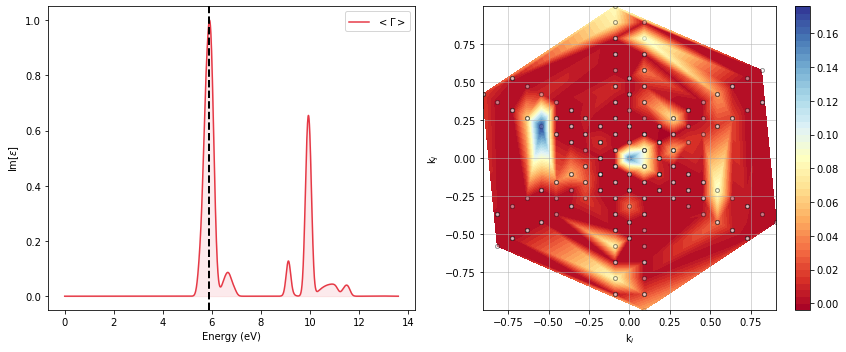

In [94]:
fig,ax1=plt.subplots(1,2,figsize=(12,5))

omega=5.9

ax=ax1[1]
plot_k(omega=omega,proj=[0,1],ax=ax,eps_axis=2)
ax.grid("on")

ax=ax1[0]
data=np.load("data/full_data.npy")
data=data.reshape(2000,-1)
y=data.T[1:].reshape(3,146,2000) # axis,kpts,omega
dos=pydos(data.T[0]*13.6,y[0:3,0,:].sum(axis=0))
dos.smear(9e-2)
dos.normalize(mode='max', value=1)
c="#e63946"
ax.plot(dos.x,dos.y,c=c,label="$<\\Gamma>$")
ax.fill_between(dos.x,dos.y,color=c,alpha=0.1)
ax.set_ylabel("Im$[\\epsilon]$")
ax.set_xlabel("Energy (eV)")

ax.axvline(omega,ls="--",lw=2,c="k")
ax.legend()
plt.tight_layout()
plt.savefig("../figs/halyana_near_gamma.png",dpi=300)
plt.show()

In [46]:
fname="data/Op.lda.r3-m"
e,dos=get_dos(fname,smear=0)
a=np.trapz(dos[300:550],x=e[300:550])
t=np.trapz(dos[300:],x=e[300:])
print(a/(t-a))
r3m=a/(t-a)

0.436028419876361


In [30]:
fname="data/Op.lda.fd3-m"
e,dos=get_dos(fname,smear=0)
a=np.trapz(dos[300:550],x=e[300:550])
t=np.trapz(dos[300:],x=e[300:])
print(a/(t-a))
fd3=a/(t-a)

0.4357023754753173


In [43]:
fname="data/Op.lda-co3o4-spinel"
e,dos=get_dos(fname,smear=0.0)
a=np.trapz(dos[300:550],x=e[300:550])
t=np.trapz(dos[300:],x=e[300:])
print(a/(t-a))
co3o4=a/(t-a)

0.5376180407172054


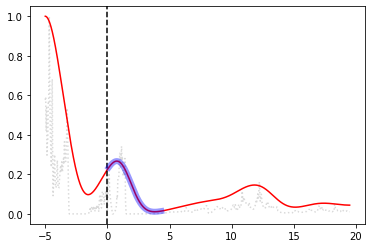

In [42]:
fname="data/Op.lda-co3o4-spinel"
e,dos=get_dos(fname,smear=0)
plt.plot(e,dos,ls=":",alpha=0.15,c="k")
e,dos=get_dos(fname,smear=.9)
plt.plot(e,dos,c="r")
plt.axvline(0,c="k",ls="--")
n=300
# n=300
m=550
plt.plot(e[n:m],dos[n:m],c="b",lw=6,alpha=0.4)

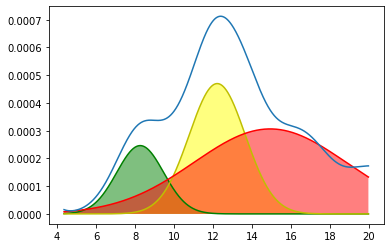

In [118]:
x_array=e[n:m]; y_array_2gauss=dos[n:m]
popt_2gauss, pcov_2gauss =optimize.curve_fit(_3gaussian, x_array, y_array_2gauss, p0=[1e-3, 7, .01, 1e-3, 13, .01,1e-3, 17.5,.005],maxfev = 10000)
perr_2gauss = np.sqrt(np.diag(pcov_2gauss))
pars_1 = popt_2gauss[0:3]
pars_2 = popt_2gauss[3:6]
pars_3 = popt_2gauss[6:9]
gauss_peak_1 = _1gaussian(x_array, *pars_1)
gauss_peak_2 = _1gaussian(x_array, *pars_2)
gauss_peak_3 = _1gaussian(x_array, *pars_3)

fig,ax1=plt.subplots()
ax1.plot(x_array, gauss_peak_1, "g")
ax1.fill_between(x_array, gauss_peak_1.min(), gauss_peak_1, facecolor="green", alpha=0.5)
  
ax1.plot(x_array, gauss_peak_2, "y")
ax1.fill_between(x_array, gauss_peak_2.min(), gauss_peak_2, facecolor="yellow", alpha=0.5) 

ax1.plot(x_array, gauss_peak_3, "r")
ax1.fill_between(x_array, gauss_peak_2.min(), gauss_peak_3, facecolor="red", alpha=0.5) 

ax1.plot(x_array,y_array_2gauss)

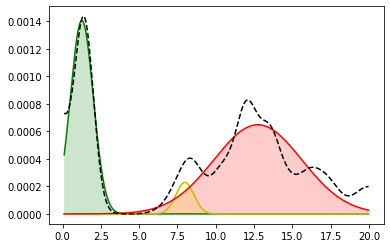

In [140]:
fname="data/Op.lda.r3-m"
e,dos=get_dos(smear=.6)
n=300
m=-1


x_array=e[n:m]; y_array_2gauss=dos[n:m]
popt_2gauss, pcov_2gauss =optimize.curve_fit(_3gaussian, x_array, y_array_2gauss, p0=[1e-3, 1, .01, 1e-3, 5, .01,1e-3, 12,.005],maxfev = 10000)
perr_2gauss = np.sqrt(np.diag(pcov_2gauss))
pars_1 = popt_2gauss[0:3]
pars_2 = popt_2gauss[3:6]
pars_3 = popt_2gauss[6:9]
gauss_peak_1 = _1gaussian(x_array, *pars_1)
gauss_peak_2 = _1gaussian(x_array, *pars_2)
gauss_peak_3 = _1gaussian(x_array, *pars_3)

fig,ax1=plt.subplots()
ax1.plot(x_array, gauss_peak_1, "g")
ax1.fill_between(x_array, gauss_peak_1.min(), gauss_peak_1, facecolor="green", alpha=0.2)
  
ax1.plot(x_array, gauss_peak_2, "y")
ax1.fill_between(x_array, gauss_peak_2.min(), gauss_peak_2, facecolor="yellow", alpha=0.2) 

ax1.plot(x_array, gauss_peak_3, "r")
ax1.fill_between(x_array, gauss_peak_2.min(), gauss_peak_3, facecolor="red", alpha=0.2) 

ax1.plot(x_array,y_array_2gauss,c="k",ls="--")

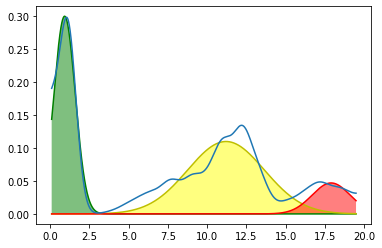

In [156]:
fname="data/Op.lda-co3o4-spinel"
e,dos=get_dos(fname,smear=.5)
n=300
m=-1
x_array=e[n:m]; y_array_2gauss=dos[n:m]
popt_2gauss, pcov_2gauss =optimize.curve_fit(_3gaussian, x_array, y_array_2gauss, p0=[1e-3, 7, .01, 1e-3, 13, .01,1e-3, 17.5,.005],maxfev = 10000)
perr_2gauss = np.sqrt(np.diag(pcov_2gauss))
pars_1 = popt_2gauss[0:3]
pars_2 = popt_2gauss[3:6]
pars_3 = popt_2gauss[6:9]
gauss_peak_1 = _1gaussian(x_array, *pars_1)
gauss_peak_2 = _1gaussian(x_array, *pars_2)
gauss_peak_3 = _1gaussian(x_array, *pars_3)

fig,ax1=plt.subplots()
ax1.plot(x_array, gauss_peak_1, "g")
ax1.fill_between(x_array, gauss_peak_1.min(), gauss_peak_1, facecolor="green", alpha=0.5)
  
ax1.plot(x_array, gauss_peak_2, "y")
ax1.fill_between(x_array, gauss_peak_2.min(), gauss_peak_2, facecolor="yellow", alpha=0.5) 

ax1.plot(x_array, gauss_peak_3, "r")
ax1.fill_between(x_array, gauss_peak_2.min(), gauss_peak_3, facecolor="red", alpha=0.5) 

ax1.plot(x_array,y_array_2gauss)

In [532]:
data=np.loadtxt("data/dosp.dat",comments="%")
np.savetxt("data/dos-LDA.csv", data, delimiter=",")

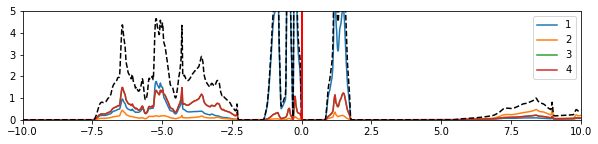

In [146]:
fig,ax=plt.subplots(figsize=(10,3))
total=data.T[1:].sum(axis=0)
for j,i in enumerate(data.T[1:]):
    ax.plot(data.T[0],i,label=j+1)
ax.plot(data.T[0],total,c="k",ls="--")
ax.axvline(0,lw=2,ls="-",c="r")
plt.ylim(0,5)
plt.xlim(-10,10)
plt.legend()
plt.show()

In [147]:
total/=np.linalg.norm(total)
t_0=total.copy()#[np.where((data.T[0]<0) &  (data.T[0]>-15))]
t_1=total.copy()#[data.T[0]>0]
t_0[np.where((data.T[0]>0)&  (data.T[0]>-10))]=0
t_1[np.where(data.T[0]<0)]=0
from scipy import signal
filter=signal.convolve(t_0, t_1, mode='same')
# filter/=np.linalg.norm(filter)

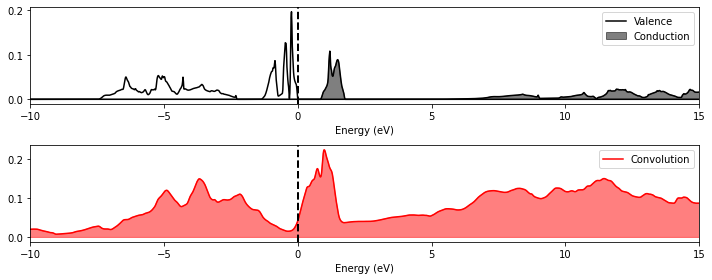

In [148]:
x=data.T[0]
fig,ax=plt.subplots(2,1,figsize=(10,4))
ax[0].plot(x,t_0,label="Valence",c="k")
ax[0].plot(x,t_1,c="k",ls="-")
ax[0].fill_between(x,t_1,label="Conduction",color="k",alpha=0.5)
ax[1].plot(x,filter,label="Convolution",c="r")
ax[1].fill_between(x,filter,color="r",alpha=0.5)
for i in ax:
    i.legend()
    i.set_xlim(-10,15)
    i.axvline(0,c="k",lw=2,ls="--")
    i.set_xlabel("Energy (eV)")
plt.tight_layout()
plt.savefig("../figs/halyana/halyana_convolution.o")
plt.show()

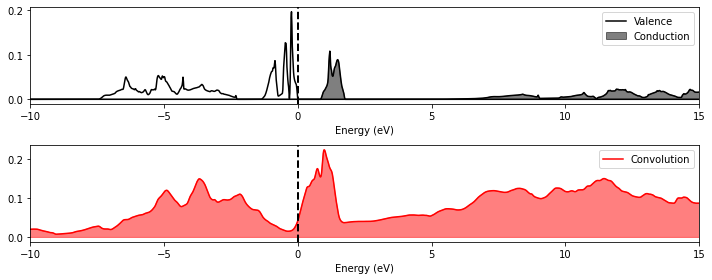

In [148]:
x=data.T[0]
fig,ax=plt.subplots(2,1,figsize=(10,4))
ax[0].plot(x,t_0,label="Valence",c="k")
ax[0].plot(x,t_1,c="k",ls="-")
ax[0].fill_between(x,t_1,label="Conduction",color="k",alpha=0.5)
ax[1].plot(x,filter,label="Convolution",c="r")
ax[1].fill_between(x,filter,color="r",alpha=0.5)
for i in ax:
    i.legend()
    i.set_xlim(-10,15)
    i.axvline(0,c="k",lw=2,ls="--")
    i.set_xlabel("Energy (eV)")
plt.tight_layout()
plt.savefig("../figs/halyana/halyana_convolution_LDA.png",dpi=300)
plt.show()

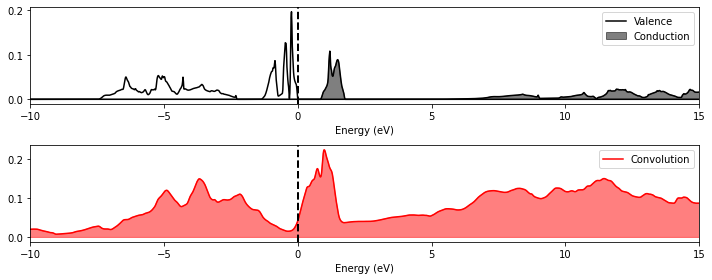

In [148]:
x=data.T[0]
fig,ax=plt.subplots(2,1,figsize=(10,4))
ax[0].plot(x,t_0,label="Valence",c="k")
ax[0].plot(x,t_1,c="k",ls="-")
ax[0].fill_between(x,t_1,label="Conduction",color="k",alpha=0.5)
ax[1].plot(x,filter,label="Convolution",c="r")
ax[1].fill_between(x,filter,color="r",alpha=0.5)
for i in ax:
    i.legend()
    i.set_xlim(-10,15)
    i.axvline(0,c="k",lw=2,ls="--")
    i.set_xlabel("Energy (eV)")
plt.tight_layout()
plt.savefig("../figs/halyana/halyana_convolution_LDA.png",dpi=300)
plt.show()

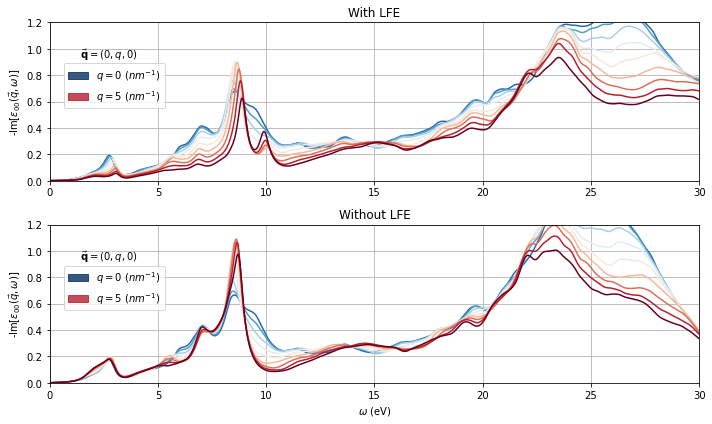

In [534]:

import matplotlib.patches as mpatches

n=10
fig,ax=plt.subplots(2,1,figsize=(10,6))
vals_lfe=[]
vals_nlfe=[]
for i in range(1,n):
    colors = plt.cm.RdBu_r(np.linspace(0,1,n))
    data=np.loadtxt("data/eels_{}.csv".format(i),delimiter=",")
    x=data.T[0]
    ax[0].plot(x,data.T[2],c=colors[i],alpha=1)
    ax[1].plot(x,data.T[1],c=colors[i],alpha=1)
    vals_lfe.append(data.T[2])
    vals_nlfe.append(data.T[1])
# ax[0].plot(x,np.array(vals_lfe).mean(axis=0),c="k",lw=3,ls=":")
# ax[1].plot(x,np.array(vals_nlfe).mean(axis=0),c="k",lw=3,ls=":")
for i in ax:
    i.set_xlim(0,30)
    i.grid("on")
    i.set_ylabel("-Im[$\epsilon_{00}(\\vec{q},\\omega)$]")
    red_patch = mpatches.Patch(color=colors[0], label='$q=0$ $(nm^{-1}$)',alpha=0.8)
    blue_patch = mpatches.Patch(color=colors[-2], label='$q=5$ $(nm^{-1}$)',alpha=0.8)
    i.legend(handles=[red_patch,blue_patch], bbox_to_anchor=[.1,.6],loc='center')
    i.text(1.4,.93,"$\\vec{\\mathbf{q}}=(0,q,0)$")
ax[0].set_title("With LFE")
ax[1].set_title("Without LFE")
ax[0].set_ylim(0,1.2)
ax[1].set_ylim(0,1.2)
ax[1].set_xlabel("$\\omega$ (eV)")


plt.tight_layout()
plt.savefig("../figs/halyana/halyana_eels_compare.png",dpi=300)
plt.show()

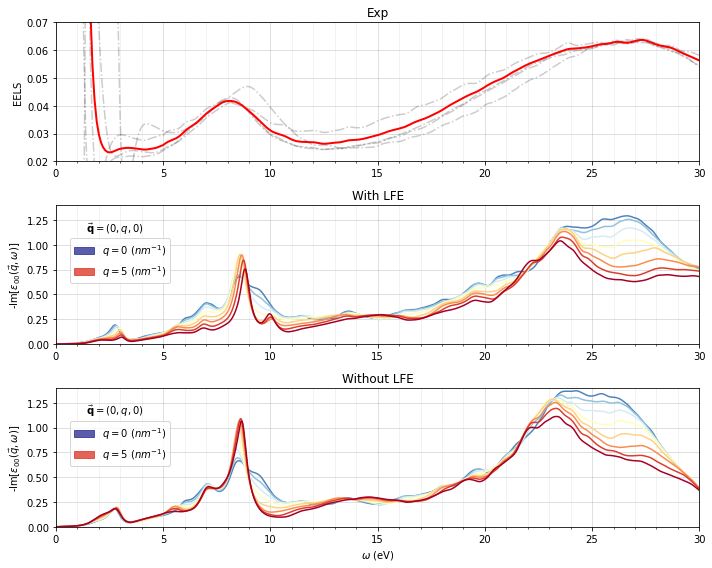

In [103]:

import matplotlib.patches as mpatches

n=9
fig,ax=plt.subplots(3,1,figsize=(10,8))
vals_lfe=[]
vals_nlfe=[]
for i in range(1,n):
    colors = plt.cm.RdYlBu_r(np.linspace(0,1,n))
    data=np.loadtxt("data/eels_{}.csv".format(i),delimiter=",")
    x=data.T[0]
    ax[1].plot(x,data.T[2],c=colors[i],alpha=1)
    ax[2].plot(x,data.T[1],c=colors[i],alpha=1)
    vals_lfe.append(data.T[2])
    vals_nlfe.append(data.T[1])
# ax[0].plot(x,np.array(vals_lfe).mean(axis=0),c="k",lw=3,ls=":")
# ax[1].plot(x,np.array(vals_nlfe).mean(axis=0),c="k",lw=3,ls=":")
for i in ax[1:]:
    i.set_xlim(0,30)
    i.grid("on")
    i.set_ylabel("-Im[$\epsilon_{00}(\\vec{q},\\omega)$]")
    red_patch = mpatches.Patch(color=colors[0], label='$q=0$ $(nm^{-1}$)',alpha=0.8)
    blue_patch = mpatches.Patch(color=colors[-2], label='$q=5$ $(nm^{-1}$)',alpha=0.8)
    i.legend(handles=[red_patch,blue_patch], bbox_to_anchor=[.1,.6],loc='center')
    xmajor_ticks = np.arange(0,31,5)
    xminor_ticks = np.arange(0,31,1)
    i.set_xticks(xmajor_ticks)
    i.set_xticks(xminor_ticks, minor=True)
    i.grid(which='both')
    i.grid(which='minor', alpha=0.2)
    i.grid(which='major', alpha=0.5)
    i.text(1.4,1.13,"$\\vec{\\mathbf{q}}=(0,q,0)$")
ax[1].set_title("With LFE")
ax[2].set_title("Without LFE")
ax[1].set_ylim(0,1.4)
ax[2].set_ylim(0,1.4)
ax[2].set_xlabel("$\\omega$ (eV)")

data=np.loadtxt("data/5a_plasmons_20C.txt", skiprows=1)
n=0
ax[0].set_title("Exp")
for i in [1,2,3,4,5]:
    ax[0].plot(data.T[0][n:],data.T[i][n:],alpha=.2,c="k",ls="-.")
ax[0].plot(data.T[0][n:],data.T[1:4][n:].mean(axis=0),c="r",lw=2,label="Average of samples")
ax[0].set_xlim(0,30)
ax[0].set_ylim(.02,.07)
ax[0].grid("on")
ax[0].set_ylabel("EELS")
ax[0].set_xticks(xmajor_ticks)
ax[0].set_xticks(xminor_ticks, minor=True)
ax[0].grid(which='both')
ax[0].grid(which='minor', alpha=0.2)
ax[0].grid(which='major', alpha=0.5)

plt.tight_layout()
plt.savefig("../figs/halyana/halyana_eels_compare.png",dpi=300)
plt.show()

In [94]:
np.arange(0,31,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

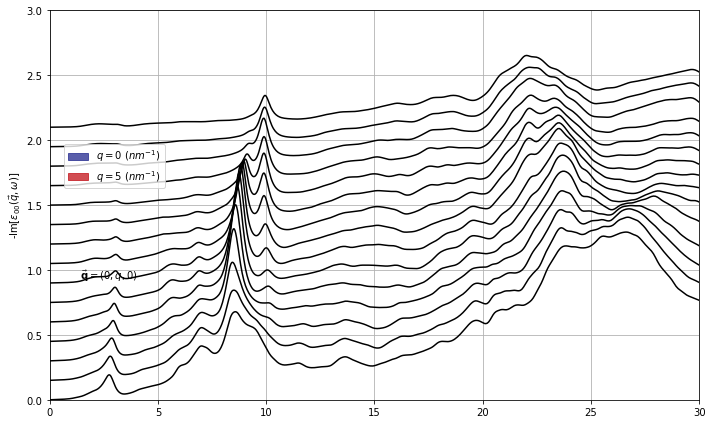

In [45]:

import matplotlib.patches as mpatches

n=16
fig,ax=plt.subplots(1,1,figsize=(10,6))
vals_lfe=[]
vals_nlfe=[]
dis=0
for i in range(1,n):
    colors = plt.cm.RdYlBu_r(np.linspace(0,1,n))
    data=np.loadtxt("data/eels_{}.csv".format(i),delimiter=",")
    x=data.T[0]
    ax.plot(x,data.T[2]+dis,c="k",alpha=1)
    dis+=0.15
    vals_lfe.append(data.T[2])
    vals_nlfe.append(data.T[1])
# ax[0].plot(x,np.array(vals_lfe).mean(axis=0),c="k",lw=3,ls=":")
# ax[1].plot(x,np.array(vals_nlfe).mean(axis=0),c="k",lw=3,ls=":")
for i in [ax]:
    i.set_xlim(0,30)
    i.set_ylim(0,3)
    i.grid("on")
    i.set_ylabel("-Im[$\epsilon_{00}(\\vec{q},\\omega)$]")
    red_patch = mpatches.Patch(color=colors[0], label='$q=0$ $(nm^{-1}$)',alpha=0.8)
    blue_patch = mpatches.Patch(color=colors[-2], label='$q=5$ $(nm^{-1}$)',alpha=0.8)
    i.legend(handles=[red_patch,blue_patch], bbox_to_anchor=[.1,.6],loc='center')
    i.text(1.4,.93,"$\\vec{\\mathbf{q}}=(0,q,0)$")



plt.tight_layout()
# plt.savefig("../figs/halyana/halyana_eels_compare.png",dpi=300)
plt.show()

In [54]:
import matplotlib.pyplot as plt

def addarrow(fig, ax):

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./20.*(ymax-ymin) 
    hl = 1./20.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)

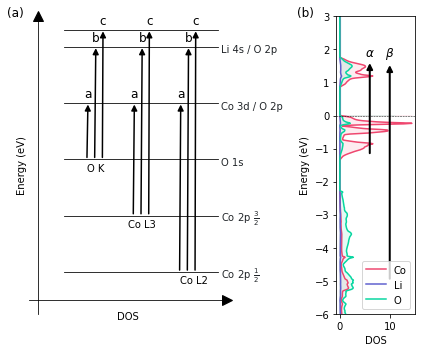

In [24]:
from matplotlib import gridspec

fig,ax1=plt.subplots(1,2,figsize=(6,5),facecolor="w")
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1.2]) 
ax = plt.subplot(gs[0])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels("")
ax.set_yticklabels("")
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')



pos=np.array([1,2,3,4,5,5.3])-0.5
for i in pos:
    ax.plot([0.1,0.7],[i,i],c="k",lw=.8)
# make arrows
ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
        transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
        transform=ax.get_xaxis_transform(), clip_on=False)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)

d=0.03;d1=.18;end=0.6
points=[[end,0,-1,'c'],[end-d,0,-2,'b'],[end-2*d,0,-3,'a'],
        [end-d1,1,-1,'c'],[end-d-d1,1,-2,'b'],[end-2*d-d1,1,-3,'a'],
       [end-2*d1,2,-1,'c'],[end-d-2*d1,2,-2,'b'],[end-2*d-2*d1,2,-3,'a']]
for i in points:
    x=i[0]
    start=pos[i[1]]
    stop=pos[i[2]]
    text=i[3]
    ax.annotate(text, xy=(x+.01, start),
                 xycoords='data',
                 xytext=(x, stop+.1),
                 textcoords='data',
                 arrowprops=dict(arrowstyle= '<|-',
                                 color='k',
                                 lw=1.5,
                                 ls='-'),
                fontsize=12
               )

for j,i in enumerate([
                    ["Co L2","Co 2p $\\frac{1}{2}$",0.55],
                    ["Co L3","Co 2p $\\frac{3}{2}$",0.35],
                    ["O K","O 1s",0.19],
                    [" ","Co 3d / O 2p",0.55],
                    [" ","Li 4s / O 2p",0.55],
                     ]):
    ax.annotate(i[0], xy=(i[2],pos[j]-.2))
    ax.annotate(i[1], xy=(0.71,pos[j]-.1),alpha=1,color="#212529")
    
ax.set_ylabel("Energy (eV)")
ax.set_xlabel("DOS")
ax.annotate("(a)", xy=(-.11, 1), xycoords="axes fraction",fontsize=12)



ax = plt.subplot(gs[1])
data=np.loadtxt("data/licoo2-r-3m-fullpdos",comments="%")
colors=["#ef476f","#5e60ce","#06d6a0"]
label=["Co","Li","O"]
for i in range(1,4):
    if i==3:
        dos=pydos(data.T[0],data.T[i]+data.T[i+1])
    else:
        dos=pydos(data.T[0],data.T[i])
    dos.smear(.01)
    ax.plot(dos.y,dos.x,c=colors[i-1],label=label[i-1])
    ax.fill_between(dos.y,dos.x,color=colors[i-1],alpha=0.1)
ax.set_ylim(-6,3)
ax.set_xlabel("DOS")
ax.set_ylabel("Energy (eV)")
ax.axhline(0,c="k",ls="--",lw=.5)
ax.legend(loc="best")
ax.annotate("(b)", xy=(-.5, 1), xycoords="axes fraction",fontsize=12)
ax.annotate("$\\alpha$", xy=(6,-1.2),
                 xycoords='data',
                 xytext=(6, 1.8),
                 horizontalalignment="center",
                 textcoords='data',
                 arrowprops=dict(arrowstyle= '<|-',
                                 color='k',
                                 lw=2,
                                 ls='-'),
                fontsize=12
               )
ax.annotate("$\\beta$", xy=(10,-5),
                 xycoords='data',
                 xytext=(10, 1.8),
                 horizontalalignment="center",
                 textcoords='data',
                 arrowprops=dict(arrowstyle= '<|-',
                                 color='k',
                                 lw=2,
                                 ls='-'),
                fontsize=12
               )

plt.tight_layout()
plt.savefig("../figs/halyana/illustration-dos.png",dpi=300, bbox_inches = 'tight',
    pad_inches = 0)
plt.show()

In [8]:
from questaal_reader import get_bands
from questaal_reader import get_bands
from pymatgen.electronic_structure.plotter import BSPlotter as bp

/Volumes/GoogleDrive/My Drive/github projects/questaal-reader/questaal_reader.py:303: UserWarning: Only site.ext format 15 supported at present 
 if things dont work That might be the problem
  warnings.warn(
<ipython-input-9-3e0936013f4b>:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


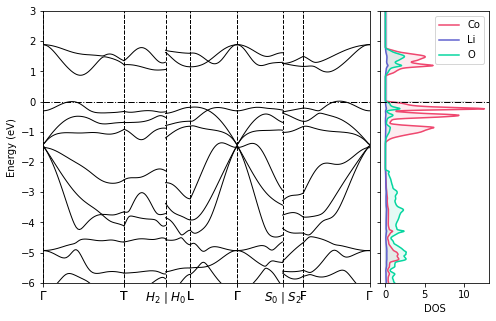

In [9]:
fig,ax1=plt.subplots(1,2,figsize=(8,5),facecolor="w")
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1],wspace=0.05) 
ax = plt.subplot(gs[0])

p_lda=get_bands("../data/bnds_LDA.temp")
bp_plot=bp(p_lda).bs_plot_data()
ef=np.max(np.array(bp_plot['energy'][0]['1'])[10])

for i in range(len(bp_plot['distances'])):
    d=bp_plot['distances'][i]
    e=bp_plot['energy'][i]['1']
    e=e-ef
    for k in e:
        ax.plot(d,k,c="k",lw=1)
for j,i in enumerate(bp_plot['ticks']["distance"]):
    ax.axvline(i,c="k",ls="--",lw=1)
ax.set_ylim(-6,3)
ax.set_xticks(bp_plot['ticks']["distance"])
ax.set_xticklabels(bp_plot['ticks']["label"],fontsize=12)
ax.axhline(0,ls="-.",c="k",lw=1)
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylabel("Energy (eV)")
# ax.annotate("(a)", xy=(-.1, 1), xycoords="axes fraction",fontsize=12)



ax = plt.subplot(gs[1])
data=np.loadtxt("data/licoo2-r-3m-fullpdos",comments="%")
colors=["#ef476f","#5e60ce","#06d6a0"]
label=["Co","Li","O"]
for i in range(1,4):
    if i==3:
        dos=pydos(data.T[0],data.T[i]+data.T[i+1])
    else:
        dos=pydos(data.T[0],data.T[i])
    dos.smear(.02)
    ax.plot(dos.y,dos.x,c=colors[i-1],label=label[i-1])
    r=ax.fill_between(dos.y,dos.x,color=colors[i-1],alpha=0.1)
ax.set_ylim(-6,3)
ax.set_xlabel("DOS")
ax.set_yticklabels("")
ax.axhline(0,ls="-.",c="k",lw=1)
ax.legend()
# ax.annotate("(b)", xy=(-.3, 1), xycoords="axes fraction",fontsize=12)

plt.tight_layout()
plt.savefig("../figs/halyana/lda-bands-dos.png",dpi=300, bbox_inches = 'tight',
    pad_inches = 0)
plt.show()



/Volumes/GoogleDrive/My Drive/github projects/questaal-reader/questaal_reader.py:303: UserWarning: Only site.ext format 15 supported at present 
 if things dont work That might be the problem
  warnings.warn(
<ipython-input-27-e61ae702ecef>:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


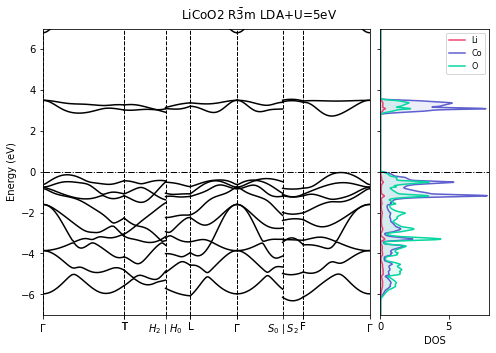

In [27]:
fig,ax1=plt.subplots(1,2,figsize=(8,5),facecolor="w")
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1],wspace=0.05) 
ax = plt.subplot(gs[0])

ymin=-7;ymax=7

p_lda=get_bands("data/licoo2-r3m/bnds.temp")
bp_plot=bp(p_lda).bs_plot_data()
ef=np.max(np.array(bp_plot['energy'][0]['1'])[10])

for i in range(len(bp_plot['distances'])):
    d=bp_plot['distances'][i]
    e=bp_plot['energy'][i]['1']
    e=e-ef-.15
    for k in e:
        ax.plot(d,k,c="k",lw=1.5)
for j,i in enumerate(bp_plot['ticks']["distance"]):
    ax.axvline(i,c="k",ls="--",lw=1)
ax.set_ylim(ymin,ymax)
ax.set_xticks(bp_plot['ticks']["distance"])
ax.set_xticklabels([i.replace(" ","") for i in bp_plot['ticks']["label"]],fontsize=10)
ax.axhline(0,ls="-.",c="k",lw=1)
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylabel("Energy (eV)")
# ax.annotate("(a)", xy=(-.1, 1), xycoords="axes fraction",fontsize=12)



ax = plt.subplot(gs[1])
data=np.loadtxt("data/licoo2-r3m/loo-r-3m-U=5-full",comments="%")
colors=["#ef476f","#5e60ce","#06d6a0"]
label=["Li","Co","O"]
nmax=0
for i in range(1,4):
    dos=pydos(data.T[0],data.T[i])
    dos.smear(.02)
    ax.plot(dos.y,dos.x,c=colors[i-1],label=label[i-1])
    r=ax.fill_betweenx(dos.x,dos.y,color=colors[i-1],alpha=0.1)
ax.set_ylim(ymin,ymax)
ax.set_xlim(0,8)
ax.set_xlabel("DOS")
ax.set_yticklabels("")
ax.axhline(0,ls="-.",c="k",lw=1)
ax.legend(fontsize=8)
# ax.annotate("(b)", xy=(-.3, 1), xycoords="axes fraction",fontsize=12)
fig.suptitle("LiCoO$2$ R$\\bar{3}$m LDA+U=5eV")
fig.subplots_adjust(top=.92)
plt.tight_layout()
plt.savefig("../figs/halyana/lda-bands-dos-lco-r3-m.png",dpi=300, bbox_inches = 'tight',pad_inches = 0)
plt.show()




/Volumes/GoogleDrive/My Drive/github projects/questaal-reader/questaal_reader.py:303: UserWarning: Only site.ext format 15 supported at present 
 if things dont work That might be the problem
  warnings.warn(
<ipython-input-186-689512035e7c>:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


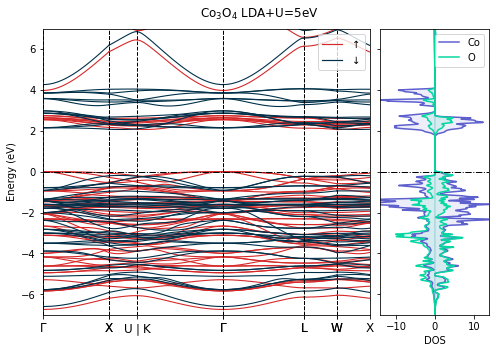

In [186]:
fig,ax1=plt.subplots(1,2,figsize=(8,5),facecolor="w")
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1],wspace=0.05) 
ax = plt.subplot(gs[0])

ymin=-7;ymax=7

p_lda=get_bands("data/co3o4/bnds.temp")
bp_plot=bp(p_lda).bs_plot_data()
ef=np.max(np.array(bp_plot['energy'][0]['1'])[10])

for i in range(len(bp_plot['distances'])):
    d=bp_plot['distances'][i]
    e=bp_plot['energy'][i]['1']
    e=e
    for k in e:
        ax.plot(d,k,c="#d62828",lw=1.1)
    d=bp_plot['distances'][i]
    e=bp_plot['energy'][i]['-1']
    e=e
    for k in e:
        ax.plot(d,k,c="#003049",lw=1.1)
for j,i in enumerate(bp_plot['ticks']["distance"]):
    ax.axvline(i,c="k",ls="--",lw=1)
ax.set_ylim(ymin,ymax)
ax.set_xticks(bp_plot['ticks']["distance"])
ax.set_xticklabels(bp_plot['ticks']["label"],fontsize=12)
ax.axhline(0,ls="-.",c="k",lw=1)
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylabel("Energy (eV)")

from matplotlib.lines import Line2D

colors = ["#d62828","#003049"]
lines = [Line2D([0], [0], color=c, linewidth=1.2, linestyle='-') for c in colors]
labels = ['$\\uparrow$',"$\\downarrow$"]
ax.legend(lines, labels,loc="upper right")
# ax.annotate("(a)", xy=(-.1, 1), xycoords="axes fraction",fontsize=12)



ax = plt.subplot(gs[1])
data=np.loadtxt("data/co3o4/coo-U=5-tdos",comments="%")
colors=["#5e60ce","#06d6a0"]
label=["Co","O"]
nmax=0
for j,i in enumerate(range(1,4,2)):
    dos=pydos(data.T[0],data.T[i])
    dos.smear(.02)
    ax.plot(dos.y,dos.x,c=colors[j],label=label[j])
    r=ax.fill_betweenx(dos.x,dos.y,color=colors[j],alpha=0.1)
    dos=pydos(data.T[0],data.T[i+1])
    dos.smear(.02)
    ax.plot(-1*dos.y,dos.x,c=colors[j])
    r=ax.fill_betweenx(dos.x,-1*dos.y,color=colors[j],alpha=0.1)
ax.set_ylim(ymin,ymax)
ax.set_xlim(-14,14)
ax.set_xlabel("DOS")
ax.set_yticklabels("")
ax.axhline(0,ls="-.",c="k",lw=1)
ax.legend(loc="upper right")
# ax.annotate("(b)", xy=(-.3, 1), xycoords="axes fraction",fontsize=12)
fig.suptitle("Co$_3$O$_4$ LDA+U=5eV")
fig.subplots_adjust(top=.92)
plt.tight_layout()
plt.savefig("../figs/halyana/lda-bands-dos-co3o4.png",dpi=300, bbox_inches = 'tight',pad_inches = 0)
plt.show()





/Volumes/GoogleDrive/My Drive/github projects/questaal-reader/questaal_reader.py:303: UserWarning: Only site.ext format 15 supported at present 
 if things dont work That might be the problem
  warnings.warn(
<ipython-input-28-5fc071effbf9>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


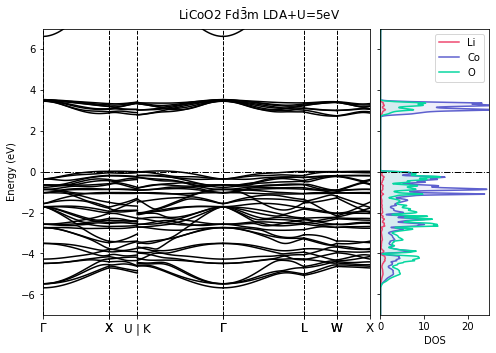

In [28]:
fig,ax1=plt.subplots(1,2,figsize=(8,5),facecolor="w")
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1],wspace=0.05) 
ax = plt.subplot(gs[0])

ymin=-7;ymax=7

p_lda=get_bands("data/licoo2-fd3m/bnds.temp")
bp_plot=bp(p_lda).bs_plot_data()
ef=np.max(np.array(bp_plot['energy'][0]['1'])[10])

for i in range(len(bp_plot['distances'])):
    d=bp_plot['distances'][i]
    e=bp_plot['energy'][i]['1']
    e=e
    for k in e:
        ax.plot(d,k,c="k",lw=1.5)
for j,i in enumerate(bp_plot['ticks']["distance"]):
    ax.axvline(i,c="k",ls="--",lw=1)
ax.set_ylim(ymin,ymax)
ax.set_xticks(bp_plot['ticks']["distance"])
ax.set_xticklabels(bp_plot['ticks']["label"],fontsize=12)
ax.axhline(0,ls="-.",c="k",lw=1)
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylabel("Energy (eV)")
# ax.annotate("(a)", xy=(-.1, 1), xycoords="axes fraction",fontsize=12)



ax = plt.subplot(gs[1])
data=np.loadtxt("data/licoo2-fd3m/co3o4-U=5-tdos",comments="%")
colors=["#ef476f","#5e60ce","#06d6a0"]
label=["Li","Co","O"]
for i in range(1,4):
    dos=pydos(data.T[0],data.T[i])
    dos.smear(.02)
    ax.plot(dos.y,dos.x,c=colors[i-1],label=label[i-1])
    r=ax.fill_betweenx(dos.x,dos.y,color=colors[i-1],alpha=0.1)
ax.set_ylim(ymin,ymax)
ax.set_xlim(0,25)
ax.set_xlabel("DOS")
ax.set_yticklabels("")
ax.axhline(0,ls="-.",c="k",lw=1)
ax.legend()
# ax.annotate("(b)", xy=(-.3, 1), xycoords="axes fraction",fontsize=12)
fig.suptitle("LiCoO$2$ Fd$\\bar{3}$m LDA+U=5eV")
fig.subplots_adjust(top=.92)
plt.tight_layout()
plt.savefig("../figs/halyana/lda-bands-dos-lco-fd3-m.png",dpi=300, bbox_inches = 'tight',pad_inches = 0)
plt.show()





In [138]:
p_lda.efermi

-2.29922606159091

/Volumes/GoogleDrive/My Drive/github projects/questaal-reader/questaal_reader.py:303: UserWarning: Only site.ext format 15 supported at present 
 if things dont work That might be the problem
  warnings.warn(
<ipython-input-21-35ab542eba6b>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


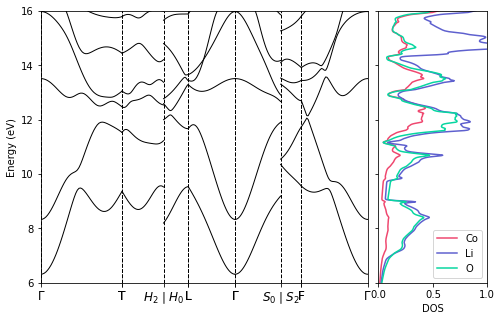

In [21]:
fig,ax1=plt.subplots(1,2,figsize=(8,5),facecolor="w")
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1],wspace=0.05) 
ax = plt.subplot(gs[0])

p_lda=get_bands("../data/bnds_LDA.temp")
bp_plot=bp(p_lda).bs_plot_data()
ef=np.max(np.array(bp_plot['energy'][0]['1'])[10])

for i in range(len(bp_plot['distances'])):
    d=bp_plot['distances'][i]
    e=bp_plot['energy'][i]['1']
    e=e-ef
    for k in e:
        ax.plot(d,k,c="k",lw=1)
for j,i in enumerate(bp_plot['ticks']["distance"]):
    ax.axvline(i,c="k",ls="--",lw=1)
ax.set_ylim(6,16)
ax.set_xticks(bp_plot['ticks']["distance"])
ax.set_xticklabels(bp_plot['ticks']["label"],fontsize=12)
ax.axhline(0,ls="-.",c="k",lw=1)
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylabel("Energy (eV)")
# ax.annotate("(a)", xy=(-.1, 1), xycoords="axes fraction",fontsize=12)



ax = plt.subplot(gs[1])
data=np.loadtxt("data/licoo2-r-3m-fullpdos",comments="%")
colors=["#ef476f","#5e60ce","#06d6a0"]
label=["Co","Li","O"]
for i in range(1,4):
    if i==3:
        dos=pydos(data.T[0],data.T[i]+data.T[i+1])
    else:
        dos=pydos(data.T[0],data.T[i])
    dos.smear(.02)
    ax.plot(dos.y,dos.x,c=colors[i-1],label=label[i-1])
#     r=ax.fill_between(dos.y,dos.x,color=colors[i-1],alpha=0.1)
ax.set_ylim(6,16)
ax.set_xlim(0,1)
ax.set_xlabel("DOS")
ax.set_yticklabels("")
ax.axhline(0,ls="-.",c="k",lw=1)
ax.legend()
# ax.annotate("(b)", xy=(-.3, 1), xycoords="axes fraction",fontsize=12)

plt.tight_layout()
plt.savefig("../figs/halyana/lda-bands-dos-higher.png",dpi=300, bbox_inches = 'tight',
    pad_inches = 0)
plt.show()




<ipython-input-103-35da1e3d4cea>:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


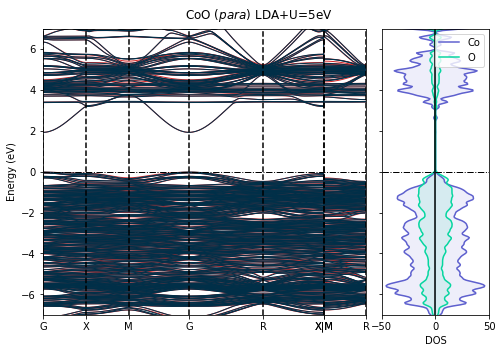

In [103]:
import pickle
fig,ax1=plt.subplots(1,2,figsize=(8,5),facecolor="w")
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1],wspace=0.07) 
ax = plt.subplot(gs[0])
ymin=-7;ymax=7


data=pickle.load(open("data/band_energies.pickle","rb"))
kpts=data["path"].get_linear_kpoint_axis()
eu=data["energies"][0]
ed=data["energies"][1]
ef=data["reference"]
eu=np.array(eu)-ef+1
ed=np.array(ed)-ef+1
for i in eu.T:
    ax.plot(kpts[0],i,c="#d62828",lw=1)
for i in ed.T:
    ax.plot(kpts[0],i,c="#003049",lw=1)
for i in kpts[1]:ax.axvline(i,c="k",ls="--")
kpts[2][-2]="X|M"
kpts[2][-3]="X|M"
ax.set_xticks(kpts[1])
ax.set_xticklabels(kpts[2])

ax.axhline(0,ls="-.",c="k",lw=1)
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylabel("Energy (eV)")
ax.set_ylim(ymin,ymax)








import pickle
with open('data/pdos.pickle', 'rb') as handle:
    dos = pickle.load(handle)
ax = plt.subplot(gs[1])
colors=["#5e60ce","#06d6a0"]
orb_names=list(dos.keys())
dos_data=np.array([dos[i]  for i in orb_names if ("Co" in i) and ("-0" in i) ]).sum(axis=0)
ax.plot(dos_data,dos['energy']+1,c=colors[0],label="Co")
ax.fill_betweenx(dos['energy']+1,dos_data,color=colors[0],alpha=0.1)

dos_data=np.array([dos[i]  for i in orb_names if ("Co" in i) and ("-1" in i) ]).sum(axis=0)
ax.plot(-1*dos_data,dos['energy']+1,c=colors[0])
ax.fill_betweenx(dos['energy']+1,-1*dos_data,color=colors[0],alpha=0.1)

dos_data=np.array([dos[i]  for i in orb_names if ("O" in i) and ("-0" in i) ]).sum(axis=0)
ax.plot(dos_data,dos['energy']+1,c=colors[1],label="O")
ax.fill_betweenx(dos['energy']+1,dos_data,color=colors[1],alpha=0.1)
dos_data=np.array([dos[i]  for i in orb_names if ("O" in i) and ("-1" in i) ]).sum(axis=0)
ax.plot(-1*dos_data,dos['energy']+1,c=colors[1])
ax.fill_betweenx(dos['energy']+1,-1*dos_data,color=colors[1],alpha=0.1)


ax.axvline(0,c="k")

# plt.legend()
ax.set_ylim(ymin,ymax)
ax.set_xlim(-50,50)
ax.set_xlabel("DOS")
ax.set_yticklabels("")
ax.axhline(0,ls="-.",c="k",lw=1)
ax.legend(loc="upper right")

fig.suptitle("CoO $(para)$ LDA+U=5eV")
fig.subplots_adjust(top=.92)
plt.tight_layout()
plt.savefig("../figs/halyana/lda-bands-dos-coo.png",dpi=300, bbox_inches = 'tight',pad_inches = 0)
plt.show()



<ipython-input-36-b444d009a24a>:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


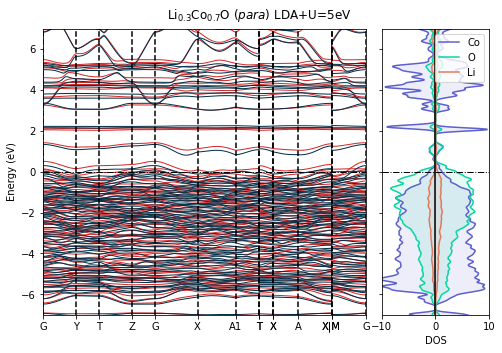

In [36]:
import pickle
fig,ax1=plt.subplots(1,2,figsize=(8,5),facecolor="w")
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1],wspace=0.07) 
ax = plt.subplot(gs[0])
ymin=-7;ymax=7


data=pickle.load(open("data/coo/bands_Li0.3Co0.3O_para.pickle","rb"))
kpts=data["path"].get_linear_kpoint_axis()
eu=data["energies"][0]
ed=data["energies"][1]
ef=data["reference"]
eu=np.array(eu)-ef
ed=np.array(ed)-ef
for i in eu.T:
    ax.plot(kpts[0],i,c="#d62828",lw=1)
for i in ed.T:
    ax.plot(kpts[0],i,c="#003049",lw=1)
for i in kpts[1]:ax.axvline(i,c="k",ls="--")
kpts[2][-2]="X|M"
kpts[2][-3]="X|M"
ax.set_xticks(kpts[1])
ax.set_xticklabels(kpts[2])

ax.axhline(0,ls="-.",c="k",lw=1)
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylabel("Energy (eV)")
ax.set_ylim(ymin,ymax)








import pickle
with open('data/coo/pdos.pickle', 'rb') as handle:
    dos = pickle.load(handle)
ax = plt.subplot(gs[1])
colors=["#5e60ce","#06d6a0","#e07a5f"]
orb_names=list(dos.keys())
dos_data=np.array([dos[i]  for i in orb_names if ("Co" in i) and ("-0" in i) ]).sum(axis=0)
ax.plot(dos_data,dos['energy'],c=colors[0],label="Co")
ax.fill_betweenx(dos['energy'],dos_data,color=colors[0],alpha=0.1)

dos_data=np.array([dos[i]  for i in orb_names if ("Co" in i) and ("-1" in i) ]).sum(axis=0)
ax.plot(-1*dos_data,dos['energy'],c=colors[0])
ax.fill_betweenx(dos['energy'],-1*dos_data,color=colors[0],alpha=0.1)

dos_data=np.array([dos[i]  for i in orb_names if ("O" in i) and ("-0" in i) ]).sum(axis=0)
ax.plot(dos_data,dos['energy'],c=colors[1],label="O")
ax.fill_betweenx(dos['energy'],dos_data,color=colors[1],alpha=0.1)
dos_data=np.array([dos[i]  for i in orb_names if ("O" in i) and ("-1" in i) ]).sum(axis=0)
ax.plot(-1*dos_data,dos['energy'],c=colors[1])
ax.fill_betweenx(dos['energy'],-1*dos_data,color=colors[1],alpha=0.1)


dos_data=np.array([dos[i]  for i in orb_names if ("Li" in i) and ("-0" in i) ]).sum(axis=0)
ax.plot(dos_data,dos['energy'],c=colors[2],label="Li")
ax.fill_betweenx(dos['energy'],dos_data,color=colors[2],alpha=0.1)
dos_data=np.array([dos[i]  for i in orb_names if ("Li" in i) and ("-1" in i) ]).sum(axis=0)
ax.plot(-1*dos_data,dos['energy'],c=colors[2])
ax.fill_betweenx(dos['energy'],-1*dos_data,color=colors[2],alpha=0.1)

ax.axvline(0,c="k")

# plt.legend()
ax.set_ylim(ymin,ymax)
ax.set_xlim(-10,10)
ax.set_xlabel("DOS")
ax.set_yticklabels("")
ax.axhline(0,ls="-.",c="k",lw=1)
ax.legend(loc="upper right")

fig.suptitle("Li$_{0.3}$Co$_{0.7}$O $(para)$ LDA+U=5eV")
fig.subplots_adjust(top=.92)
plt.tight_layout()
plt.savefig("../figs/halyana/lda-bands-dos-li0.3coo.png",dpi=300, bbox_inches = 'tight',pad_inches = 0)
plt.show()




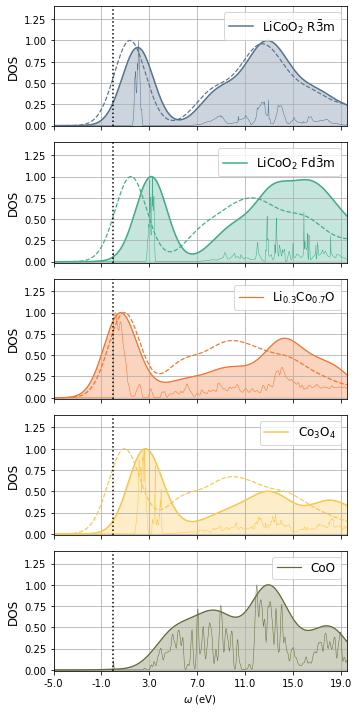

In [27]:
import matplotlib.ticker as ticker

s=1.3;fs=12
fig,ax1=plt.subplots(5,1,figsize=(5,10))
plt.subplots_adjust(hspace=0)



colors=["#577590","#43aa8b","#f9c74f","#606c38","#f3722c"]
ax=ax1[0]

fname="data/U/licoo2-r-3m-U=5";c=colors[0];label="LiCoO$_2$ R$\\bar{3}$m"
e,dos=get_dos(fname,smear=0,coloumn=2)
ax.plot(e,dos,ls="-",alpha=1,c=c,lw=0.5)
e,dos=get_dos(fname,smear=s,coloumn=2)
ax.plot(e,dos,c=c,label=label)
ax.fill_between(e,dos,color=c,alpha=0.3)
fname="data/Op.lda.r3-m"
e,dos=get_dos(fname,smear=s,coloumn=1)
ax.plot(e,dos,ls="--",alpha=1,c=c,lw=1.2)



ax=ax1[1]
fname="data/U/licoo2-fd3-m-U=5";c=colors[1];label="LiCoO$_2$ Fd$\\bar{3}$m"
e,dos=get_dos(fname,smear=0)
ax.plot(e,dos,ls="-",alpha=1,c=c,lw=0.5)
e,dos=get_dos(fname,smear=s)
ax.plot(e,dos,c=c,label=label)
ax.fill_between(e,dos,color=c,alpha=0.3)
fname="data/Op.lda.fd3-m"
e,dos=get_dos(fname,smear=s,coloumn=1)
ax.plot(e,dos,ls="--",alpha=1,c=c,lw=1.2)



ax=ax1[2]
fname="data/Op.lda.cooli0.3";c=colors[4];label="Li$_{0.3}$Co$_{0.7}$O"
e,dos=get_dos(fname,smear=s)
ax.plot(e,dos,ls="--",alpha=1,c=c,lw=1.2)

import pickle
with open('data/coo/pdos.pickle', 'rb') as handle:
    dos = pickle.load(handle)

orb_names=list(dos.keys())
dos_data=np.array([dos[i]  for i in orb_names if ("O" in i) and ("p" in i) ]).sum(axis=0)
dos_data[np.where((dos['energy']+1<0))]=0
dos_data[np.where((dos['energy']+1>20))]=0
dos=pydos(dos['energy']+1,dos_data)
dos.normalize(mode='max', value=1)
ax.plot(dos.x,dos.y,ls="-",alpha=1,c=c,lw=0.5)
dos.smear(s)
dos.normalize(mode='max', value=1)
ax.plot(dos.x,dos.y,ls="-",alpha=1,c=c,lw=1.2,label=label)
ax.fill_between(dos.x,dos.y,color=c,alpha=0.3)



ax=ax1[3]
fname="data/U/co3o4-U=5";c=colors[2];label="Co$_3$O$_4$"
e,dos=get_dos(fname,smear=0)
ax.plot(e,dos,ls="-",alpha=1,c=c,lw=0.5)
e,dos=get_dos(fname,smear=s)
ax.plot(e,dos,c=c,label=label)
ax.fill_between(e,dos,color=c,alpha=0.3)
fname="data/Op.lda.cooli0.3"
e,dos=get_dos(fname,smear=s,coloumn=1)
ax.plot(e,dos,ls="--",alpha=1,c=c,lw=1.2)




c=colors[3];label="CoO"
import pickle
with open('data/pdos.pickle', 'rb') as handle:
    dos = pickle.load(handle)
ax=ax1[4]
orb_names=list(dos.keys())
dos_data=np.array([dos[i]  for i in orb_names if ("O" in i) and ("p" in i) ]).sum(axis=0)
dos_data[np.where((dos['energy']+1<0))]=0
dos_data[np.where((dos['energy']+1>20))]=0
dos=pydos(dos['energy']+1,dos_data)
dos.normalize(mode='max', value=1)
ax.plot(dos.x,dos.y,ls="-",alpha=1,c=c,lw=0.5)
dos.smear(s)
dos.normalize(mode='max', value=1)
ax.plot(dos.x,dos.y,ls="-",alpha=1,c=c,lw=1.2,label=label)
ax.fill_between(dos.x,dos.y,color=c,alpha=0.3)
ax.set_xlabel("$\\omega$ (eV)")


for j,i in enumerate(ax1):
    i.axvline(0,c="k",ls=":")
    i.set_ylim(-0.01,1.4)
    i.set_xlim(xmin=-5,xmax=19.5)
    start, end = i.get_xlim()
    i.xaxis.set_ticks(np.arange(start, end, 4))
    i.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    i.legend(fontsize=fs)
    if j<4:
        i.set_xticklabels("")
    i.grid()
    i.set_ylabel("DOS",fontsize=fs)
    

plt.tight_layout()
plt.savefig("../figs/halyana/halyana-DOS-compare-O-p-U.png",dpi=300)

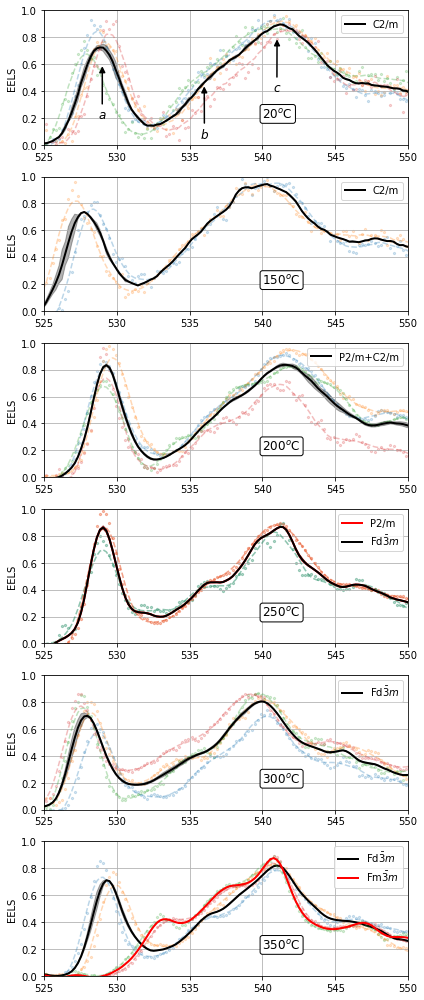

In [330]:
from scipy.signal import savgol_filter
from scipy.interpolate import griddata

def plot_abc(fname,ax,s=None,c="k",lab=None,temp=None):
    try:
        data=np.loadtxt(fname, skiprows=1)
    except:
        data=np.loadtxt(fname, skiprows=2)
    header=None
    try:
        f = open(fname)
        header = [i.replace("\n","")for i in f.readline().split('\t')][1::2]
    except:None
    x=data.T[0::2]
    y=data.T[1::2]
    Y=[]
    X=[]
    if s==None:
        s=range(y.shape[0])
    for i in [range(y.shape[0])[j] for j in s]:
            if header!=None:
                label=header[i]
            t = np.linspace(0,650, 3000)
            y1=griddata(x[i],y[i],t,method='linear')
            ax.scatter(t,y1,alpha=.2,s=5)#,label=label)
            yhat = savgol_filter(y1, 19, 2)
            ax.plot(t,yhat,alpha=.3,ls="--")
            X.append(t);Y.append(y1)
            ax.set_xlim([525,550])
            ax.set_ylim(0,1)

    X1=np.array(X).mean(axis=0)
    Y1=np.array(Y).mean(axis=0)
    var=np.array(Y).var(axis=0)
    yhat = savgol_filter(Y1, 11, 2)
    ax.fill_between(t,yhat-var,yhat+var,alpha=.3,color=c)
    ax.plot(t,yhat,c=c,lw=2,label=lab)
    if temp!=None:
        ax.text(540,.2, str(temp)+'$^o$C', color='black', 
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.2'),fontsize=12)
    ax.grid("on")
    ax.set_ylabel("EELS")
    ax.legend(loc="upper right")
fig,ax1=plt.subplots(6,1,figsize=(6,14),facecolor="w")

ax=ax1[0]
fname="data/exp-data/OK-abc/20C.txt"
plot_abc(fname,ax,lab="C2/m",temp=20)
p=[[529,.6,"$a$"],[536,.45,"$b$"],[541,.8,"$c$"]]
for i in p:
    ax.annotate(i[2], xy=(i[0], i[1]),
                 xycoords='data',
                 xytext=(i[0]-.3, i[1]-.4),
                 textcoords='data',
                 arrowprops=dict(arrowstyle= '-|>',
                                 color='k',
                                 lw=1.5),
                fontsize=12
                 )

ax=ax1[-5]
fname="data/exp-data/OK-abc/150C.txt"
plot_abc(fname,ax,lab="C2/m",temp=150)

ax=ax1[-4]
fname="data/exp-data/OK-abc/200C.txt"
plot_abc(fname,ax,s=[0,2,3,4],lab="P2/m+C2/m",temp=200)


ax=ax1[-3]
fname="data/exp-data/OK-abc/250C.txt"
plot_abc(fname,ax,s=[0,1],lab="P2/m",temp=250,c="r")
plot_abc(fname,ax,s=[0,1],lab="Fd$\\bar{3}m$",c="k")

ax=ax1[-2]
fname="data/exp-data/OK-abc/300C.txt"
plot_abc(fname,ax,lab="Fd$\\bar{3}m$",temp=300)


ax=ax1[-1]
fname="data/exp-data/OK-abc/350C.txt"
plot_abc(fname,ax,s=[1,2],lab="Fd$\\bar{3}m$",temp=350)
plot_abc(fname,ax,s=[0,3],c="r",lab="Fm$\\bar{3}m$")
plt.tight_layout()
plt.savefig("../figs/halyana/halayana-exp.png",dpi=300)

In [59]:
def plot_exp(ax1):
    from scipy.signal import savgol_filter
    from scipy.interpolate import griddata

    def plot_abc(fname,ax,s=None,c="k",lab=None,temp=None):
        try:
            data=np.loadtxt(fname, skiprows=1)
        except:
            data=np.loadtxt(fname, skiprows=2)
        header=None
        try:
            f = open(fname)
            header = [i.replace("\n","")for i in f.readline().split('\t')][1::2]
        except:None
        x=data.T[0::2]
        y=data.T[1::2]
        Y=[]
        X=[]
        if s==None:
            s=range(y.shape[0])
        for i in [range(y.shape[0])[j] for j in s]:
                if header!=None:
                    label=header[i]
                t = np.linspace(0,650, 3000)
                y1=griddata(x[i],y[i],t,method='linear')
                ax.scatter(t,y1,alpha=.2,s=5)#,label=label)
                yhat = savgol_filter(y1, 19, 2)
                ax.plot(t,yhat,alpha=.3,ls="--")
                X.append(t);Y.append(y1)
                ax.set_xlim([525,550])
                ax.set_ylim(0,1)

        X1=np.array(X).mean(axis=0)
        Y1=np.array(Y).mean(axis=0)
        var=np.array(Y).var(axis=0)
        yhat = savgol_filter(Y1, 11, 2)
        ax.fill_between(t,yhat-var,yhat+var,alpha=.3,color=c)
        ax.plot(t,yhat,c=c,lw=2,label=lab)
        if temp!=None:
            ax.text(540,.2, str(temp)+'$^o$C', color='black', 
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.2'),fontsize=12)
        ax.grid("on")
        ax.set_ylabel("EELS")
        ax.legend(loc="upper right")

    ax=ax1[0]
    for spine in ax.spines.values():
        spine.set_edgecolor('r')
    fname="data/exp-data/OK-abc/20C.txt"
    plot_abc(fname,ax,lab="C2/m",temp=20)
    p=[[529,.6,"$a$"],[536,.45,"$b$"],[541,.8,"$c$"]]
    for i in p:
        ax.annotate(i[2], xy=(i[0], i[1]),
                     xycoords='data',
                     xytext=(i[0]-.3, i[1]-.4),
                     textcoords='data',
                     arrowprops=dict(arrowstyle= '-|>',
                                     color='k',
                                     lw=1.5),
                    fontsize=12
                     )

    ax=ax1[-5]
    fname="data/exp-data/OK-abc/150C.txt"
    plot_abc(fname,ax,lab="C2/m",temp=150)

    ax=ax1[-4]
    fname="data/exp-data/OK-abc/200C.txt"
    plot_abc(fname,ax,s=[0,2,3,4],lab="P2/m+C2/m",temp=200)


    ax=ax1[-3]
    fname="data/exp-data/OK-abc/250C.txt"
    plot_abc(fname,ax,s=[0,1],lab="P2/m",temp=250,c="r")
    plot_abc(fname,ax,s=[0,1],lab="Fd$\\bar{3}m$",c="k")

    ax=ax1[-2]
    fname="data/exp-data/OK-abc/300C.txt"
    plot_abc(fname,ax,lab="Fd$\\bar{3}m$",temp=300)


    ax=ax1[-1]
    fname="data/exp-data/OK-abc/350C.txt"
    plot_abc(fname,ax,s=[1,2],lab="Fd$\\bar{3}m$",temp=350)
    plot_abc(fname,ax,s=[0,3],c="r",lab="Fm$\\bar{3}m$")
    ax.set_xlabel("$\\omega$ (eV)")
    for spine in ax.spines.values():
        spine.set_edgecolor('r')
# plt.tight_layout()
# plt.savefig("../figs/halyana/halayana-exp.png",dpi=300)

In [68]:
def get_dos(fname="data/Op.lda.r3-m",smear=0,coloumn=1):
    data=np.loadtxt(fname,comments="%")
    data.T[coloumn][np.where(data.T[0]<0)]=0
    dos=pydos(data.T[0]+527,data.T[coloumn])
    if smear!=0:
        dos.smear(smear)
    dos.normalize(mode='max', value=1)
    return (dos.x,dos.y)
def plot_theory(ax1):
    import matplotlib.ticker as ticker
    s=1.3;fs=12

    colors=["#577590","#43aa8b","#f9c74f","#606c38","#f3722c","#d00000"]
#     ax=ax1[0]

#     fname="data/U/licoo2-r-3m-U=5";c=colors[0];label="LiCoO$_2$ R$\\bar{3}$m"
#     e,dos=get_dos(fname,smear=0,coloumn=2)
#     ax.plot(e,dos,ls="-",alpha=1,c=c,lw=0.5)
#     e,dos=get_dos(fname,smear=s,coloumn=2)
#     ax.plot(e,dos,c=c,label=label)
#     ax.fill_between(e,dos,color=c,alpha=0.3)
#     fname="data/Op.lda.r3-m"
#     e,dos=get_dos(fname,smear=s,coloumn=1)
#     ax.plot(e,dos,ls="--",alpha=1,c=c,lw=1.2)



    ax=ax1[1]
    fname="data/U/licoo2-fd3-m-U=5";c=colors[1];label="LiCoO$_2$ Fd$\\bar{3}$m"
    e,dos=get_dos(fname,smear=0)
    ax.plot(e,dos,ls="-",alpha=1,c=c,lw=0.5)
    e,dos=get_dos(fname,smear=s)
    ax.plot(e,dos,c=c,label=label)
    ax.fill_between(e,dos,color=c,alpha=0.3)
#     fname="data/Op.lda.fd3-m"
#     e,dos=get_dos(fname,smear=s,coloumn=1)
#     ax.plot(e,dos,ls="--",alpha=1,c=c,lw=1.2)



    ax=ax1[2]
    fname="data/Op.lda.cooli0.3";c=colors[4];label="Li$_{0.3}$Co$_{0.7}$O"
#     e,dos=get_dos(fname,smear=0)
#     ax.plot(e,dos,ls="-",alpha=1,c=c,lw=0.5)
#     e,dos=get_dos(fname,smear=s)
#     ax.plot(e,dos,c=c,label=label)
#     ax.fill_between(e,dos,color=c,alpha=0.3)
#     ax.plot(e,dos,ls="--",alpha=1,c=c,lw=1.2)

    import pickle
    with open('data/coo/pdos.pickle', 'rb') as handle:
        dos = pickle.load(handle)

    orb_names=list(dos.keys())
    dos_data=np.array([dos[i]  for i in orb_names if ("O" in i) and ("p" in i) ]).sum(axis=0)
    dos_data[np.where((dos['energy']+1<0))]=0
    dos_data[np.where((dos['energy']+1>20))]=0
    dos=pydos(dos['energy']+527,dos_data)
    dos.normalize(mode='max', value=1)
    ax.plot(dos.x,dos.y,ls="-",alpha=1,c=c,lw=0.5)
    dos.smear(s)
    dos.normalize(mode='max', value=1)
    ax.plot(dos.x,dos.y,ls="-",alpha=1,c=c,lw=1.2,label=label)
    ax.fill_between(dos.x,dos.y,color=c,alpha=0.3)




    ax=ax1[2]
    fname="data/U/co3o4-U=5";c=colors[2];label="Co$_3$O$_4$"
    e,dos=get_dos(fname,smear=0)
    ax.plot(e,dos,ls="-",alpha=1,c=c,lw=0.5)
    e,dos=get_dos(fname,smear=s)
    ax.plot(e,dos,c=c,label=label)
    ax.fill_between(e,dos,color=c,alpha=0.3)
#     fname="data/Op.lda.cooli0.3"
#     e,dos=get_dos(fname,smear=s,coloumn=1)
#     ax.plot(e,dos,ls="--",alpha=1,c=c,lw=1.2)




    c=colors[-1];label="CoO"
    import pickle
    with open('data/pdos.pickle', 'rb') as handle:
        dos = pickle.load(handle)
    ax=ax1[3]
    orb_names=list(dos.keys())
    dos_data=np.array([dos[i]  for i in orb_names if ("O" in i) and ("p" in i) ]).sum(axis=0)
    dos_data[np.where((dos['energy']+1<0))]=0
    dos_data[np.where((dos['energy']+1>20))]=0
    dos=pydos(dos['energy']+1+527,dos_data)
    dos.normalize(mode='max', value=1)
    ax.plot(dos.x,dos.y,ls="-",alpha=1,c=c,lw=0.5)
    dos.smear(1.2)
    dos.normalize(mode='max', value=1)
    ax.plot(dos.x,dos.y,ls="-",alpha=1,c=c,lw=1.2,label=label)
    ax.fill_between(dos.x,dos.y,color=c,alpha=0.3)
    ax.set_xlabel("$\\omega$ (eV)")
    for spine in ax.spines.values():
        spine.set_edgecolor('r')
    for j,i in enumerate(ax1):
        i.axvline(0,c="k",ls=":")
        i.set_ylim(-0.01,1.1)
        i.set_xlim(xmin=525,xmax=550)
        start, end = i.get_xlim()
        i.xaxis.set_ticks(np.arange(start, end+1, 5))
        i.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
        i.legend(fontsize=fs,loc="upper left")
        i.grid()
        i.set_ylabel("DOS",fontsize=fs)

def compare_core(ax):
    def get_dos(fname="data/Op.lda.r3-m",smear=0,coloumn=1,m=0,v=0,s=0):
        data=np.loadtxt(fname,comments="%")
        data.T[coloumn][np.where(data.T[0]<0)]=0
        if m!=0:
            t=np.exp(-np.square(data.T[0]-m)/2*v)/(np.sqrt(2*np.pi*v))*s
            add=-.3
        else:
            t=0;add=0
        dos=pydos(data.T[0]+add+527,data.T[coloumn]+t)
        if smear!=0:
            dos.smear(smear)
        dos.normalize(mode='max', value=1)
        return (dos.x,dos.y)



    fname="data/U/licoo2-r-3m-U=5"
    e,dos=get_dos(fname,smear=1.2,coloumn=2)
    ax.plot(e,dos,ls="-",alpha=1,c="#577590",lw=1.2,label="w/o Core hole GGA+U")
    ax.fill_between(e,dos,alpha=0.2,color="#577590")

    fname="data/Op.lda.r3-m"
    e,dos=get_dos(fname,smear=1.2,coloumn=1,m=13,v=10,s=1.9)
    ax.plot(e,dos,ls="-",alpha=1,c="#1452c4",lw=2,label="Core hole GGA")


    fname="data/Op.lda.r3-m"
    e,dos=get_dos(fname,smear=1.2,coloumn=1)
    ax.plot(e,dos,ls="--",alpha=1,c="k",lw=1.2,label="w/o Core hole GGA")
    ax.set_xlim(525,550)
    plt.tight_layout()
    ax.set_xlabel("Energy (eV)")
    ax.set_ylabel("DOS")
    ax.legend(loc="lower right",fontsize=8)
    ax.set_ylim(0,1.1)
    ax.grid()
    for spine in ax.spines.values():
        spine.set_edgecolor('r')
#     ax.set_xticks(np.arange(-5,21,5))
#     plt.savefig("../figs/halyana/halyana-corehole-compare.png",dpi=300)
#     ax.set_title("LiCoO$_2$ R$\\bar{3}$m")


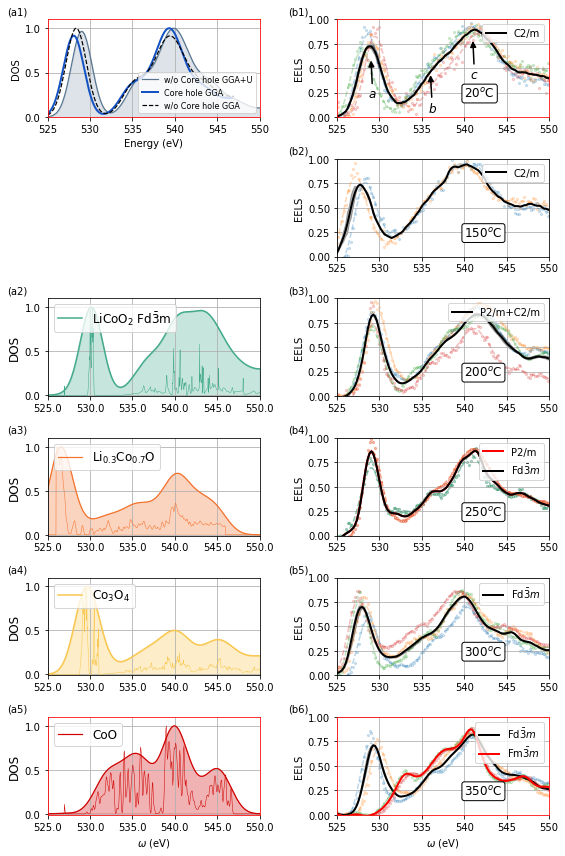

In [69]:

fig = plt.figure(figsize=(8, 12))
a=[]
for i in range(6):
    a.append(plt.subplot2grid((6, 2), (i, 1)))
plot_exp(a)
for j,i in enumerate(a):
    i.annotate("(b"+str(j+1)+")", xy=(-.23,1.05), xycoords="axes fraction",fontsize=10)

a=[]   

ax=plt.subplot2grid((6, 2), (0, 0))
compare_core(ax)
ax.annotate("(a1)", xy=(-.19,1.05), xycoords="axes fraction",fontsize=10)
a.append(ax)  
a=[]
for i in [2,3,4,5]:
    a.append(plt.subplot2grid((6, 2), (i, 0)))


def get_axis_limits(ax, scale=-.1):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*scale
for j,i in enumerate(a):
    i.annotate("(a"+str(j+2)+")", xy=(-.19,1.05), xycoords="axes fraction",fontsize=10)
plot_theory(a)



# a[-1].annotate('Theory',
#             xy=(533,0),  # theta, radius
#             xytext=(530,-1.3),    # fraction, fraction
# #             textcoords='axes fraction',
# #             xycoords='axes fraction',
#             arrowprops=dict(arrowstyle="->",lw=2),
#             horizontalalignment='left',
#             verticalalignment='bottom',
#             fontsize=14)

# a[-1].annotate('Exp.',
#             xy=(1,-.92),  # theta, radius
#             xytext=(.5,-1),    # fraction, fraction
#             textcoords='axes fraction',
#             xycoords='axes fraction',
#             arrowprops=dict(arrowstyle="->",lw=2),
#             horizontalalignment='left',
#             verticalalignment='bottom',
#             fontsize=14)

plt.tight_layout()
# plt.savefig("../figs/halyana/complete-520.png",dpi=300)

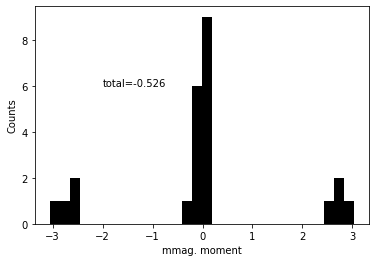

In [51]:
mmom_licoo=[ 2.53609613e+00,  2.63171616e+00,  2.63490086e+00,  3.03575143e+00,
       -2.46348135e-03,  5.06942374e-03, -3.21777840e-03, -2.13894156e-03,
       -2.62697254e+00, -2.65928693e+00, -3.05810889e+00, -2.62893894e+00,
       -4.94565697e-02, -9.24617815e-02, -7.51374516e-02,  9.66049259e-02,
        2.20041972e-02, -1.39461673e-02, -3.44811674e-02, -4.49569492e-02,
        1.03672749e-01, -3.13142508e-01,  1.77153031e-02, -5.23609912e-03]
a=plt.hist(mmom_licoo,bins=30,color="k")
plt.annotate("total=%.3f" %np.sum(mmom_licoo),(-2,6))
plt.ylabel("Counts")
plt.xlabel("mmag. moment")
plt.savefig("../figs/halyana/licoo_magmom.png",dpi=300)

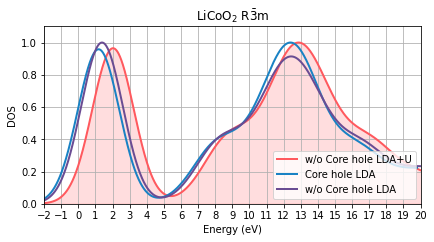

In [155]:
def get_dos(fname="data/Op.lda.r3-m",smear=0,coloumn=1,m=0,v=0,s=0):
    data=np.loadtxt(fname,comments="%")
    data.T[coloumn][np.where(data.T[0]<0)]=0
    if m!=0:
        t=np.exp(-np.square(data.T[0]-m)/2*v)/(np.sqrt(2*np.pi*v))*s
        add=-.2
    else:
        t=0;add=0
    dos=pydos(data.T[0]+add,data.T[coloumn]+t)
    if smear!=0:
        dos.smear(smear)
    dos.normalize(mode='max', value=1)
    return (dos.x,dos.y)


fig,ax=plt.subplots(figsize=(6,3))

fname="data/U/licoo2-r-3m-U=5"
e,dos=get_dos(fname,smear=1.2,coloumn=2)
ax.plot(e,dos,ls="-",alpha=1,c="#ff595e",lw=2,label="w/o Core hole LDA+U")
ax.fill_between(e,dos,alpha=0.2,color="#ff595e")

fname="data/Op.lda.r3-m"
e,dos=get_dos(fname,smear=1.2,coloumn=1,m=13,v=10,s=1.4)
ax.plot(e,dos,ls="-",alpha=1,c="#1982c4",lw=2,label="Core hole LDA")
ax.set_xlim(-5,20)


fname="data/Op.lda.r3-m"
e,dos=get_dos(fname,smear=1.2,coloumn=1)
ax.plot(e,dos,ls="-",alpha=1,c="#6a4c93",lw=2,label="w/o Core hole LDA")
ax.set_xlim(-2,20)
plt.tight_layout()
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("DOS")
plt.legend(loc="lower right")
ax.set_ylim(0,1.1)
ax.grid()
ax.set_xticks(np.arange(-2,21,1))
plt.savefig("../figs/halyana/halyana-corehole-compare.png",dpi=300)
ax.set_title("LiCoO$_2$ R$\\bar{3}$m")
plt.show()

(525.0, 545.0)

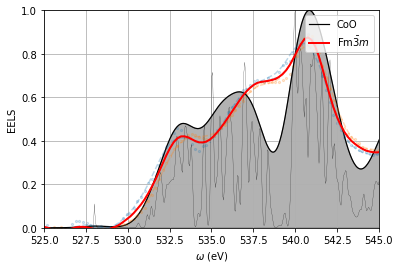

In [50]:
fig,ax=plt.subplots()


def plot_abc(fname,ax,s=None,c="k",lab=None,temp=None,m=0):
    from scipy.signal import savgol_filter
    from scipy.interpolate import griddata
    try:
        data=np.loadtxt(fname, skiprows=1)
    except:
        data=np.loadtxt(fname, skiprows=2)
    header=None
    try:
        f = open(fname)
        header = [i.replace("\n","")for i in f.readline().split('\t')][1::2]
    except:None
    x=data.T[0::2]+m
    y=data.T[1::2]
    Y=[]
    X=[]
    if s==None:
        s=range(y.shape[0])
    for i in [range(y.shape[0])[j] for j in s]:
            if header!=None:
                label=header[i]
            t = np.linspace(0,650, 3000)
            y1=griddata(x[i],y[i],t,method='linear')
            ax.scatter(t,y1,alpha=.2,s=5)#,label=label)
            yhat = savgol_filter(y1, 19, 2)
            ax.plot(t,yhat,alpha=.3,ls="--")
            X.append(t);Y.append(y1)
            ax.set_ylim(0,1)
    X1=np.array(X).mean(axis=0)
    Y1=np.array(Y).mean(axis=0)
    var=np.array(Y).var(axis=0)
    yhat = savgol_filter(Y1, 11, 2)
    ax.fill_between(t,yhat-var,yhat+var,alpha=.3,color=c)
    ax.plot(t,yhat,c=c,lw=2,label=lab)
    if temp!=None:
        ax.text(540,.2, str(temp)+'$^o$C', color='black', 
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.2'),fontsize=12)
    ax.grid("on")
    ax.set_ylabel("EELS")
    ax.legend(loc="upper right")

c="k";label="CoO"
import pickle
with open('data/pdos.pickle', 'rb') as handle:
    dos = pickle.load(handle)
orb_names=list(dos.keys())
dos_data=np.array([dos[i]  for i in orb_names if ("O" in i) and ("p" in i) ]).sum(axis=0)
dos_data[np.where((dos['energy']+1<0))]=0
dos_data[np.where((dos['energy']+1>20))]=0
dos=pydos(dos['energy']+529,dos_data)
dos.normalize(mode='max', value=1)
ax.plot(dos.x,dos.y,ls="-",alpha=1,c=c,lw=0.2)
dos.smear(.8)
dos.normalize(mode='max', value=1)
ax.plot(dos.x,dos.y,ls="-",alpha=1,c=c,lw=1.2,label=label)
ax.fill_between(dos.x,dos.y,color=c,alpha=0.3)
ax.set_xlabel("$\\omega$ (eV)")

fname="data/exp-data/OK-abc/350C.txt"
plot_abc(fname,ax,s=[0,3],c="r",lab="Fm$\\bar{3}m$")

ax.set_xlim(525,545)